<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/sprint_machine_learning_DecisionTree_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 機械学習スクラッチ 決定木

## 決定木分類器の実装

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    # 対象データの件数を返す
    def _total_count_cal(self, df):        # 問題【１】不純度を求める関数　以下、４関数
        total_count = len(df)
        return total_count

    # ノードのジニ不純度を返す
    def _gini_purity_class_node(self, df):
        #dfの総数を求める
        total_count = self._total_count_cal(df)
        #ノードのジニ不純度を求める
        total_0 = np.sum(df[:, -1] == 0)
        total_1 = np.sum(df[:, -1] == 1)

        jini_purity_node = 1 - ((total_0 / total_count)**2 + (total_1 / total_count)**2)

        if self.verbose:
            print("total_count={}".format(total_count))
            print("total_0={}".format(total_0))
            print("total_1={}".format(total_1))
            print("jini_purity_total={}\n".format(jini_purity_node))

        return jini_purity_node
    
    # クラス左側（または下側）のジニ不純度を返す
    def _gini_purity_class_left(self, df, i):
        #dfの総数を求める
        total_count = self._total_count_cal(df)
        #左側(下側)のクラスのジニ不純度を求める
        left_count = i
        left_0 = np.sum(df[:i, -1] == 0)
        left_1 = np.sum(df[:i, -1] == 1)

        if left_0 < left_1 :
            judge_left = 1
        else :
            judge_left = 0
    
        jini_purity_left = 1 - ((left_0 / left_count)**2 + (left_1 / left_count)**2)

        if self.verbose:
            print("total_count={}".format(total_count))
            print("left_0={}".format(left_0))
            print("left_1={}".format(left_1))
            print("jini_purity_left={}\n".format(jini_purity_left))
    
        return jini_purity_left, judge_left

    # クラス右側（または上側）のジニ不純度を返す
    def _gini_purity_class_right(self, df, i):
        #dfの総数を求める
        total_count = self._total_count_cal(df)
        #右側(上側)のクラスのジニ不純度を求める
        right_count = total_count - i
        right_0 = np.sum(df[i:, -1] == 0)
        right_1 = np.sum(df[i:, -1] == 1)
        
        if right_0 < right_1 :
            judge_right = 1
        else :
            judge_right = 0

        jini_purity_right = 1 - ((right_0 / right_count)**2 + (right_1 / right_count)**2)

        if self.verbose:
            print("total_count={}".format(total_count))
            print("right_0={}".format(right_0))
            print("right_1={}".format(right_1))
            print("jini_purity_right={}\n".format(jini_purity_right))
            print("df={}".format(df[i]))

        return jini_purity_right, judge_right

    # 情報利得を返す
    def _gain_information(self, df, i):    # 問題【２】情報利得を求める関数
        #dfの総数を求める
        total_count = self._total_count_cal(df)
        #情報利得を求める
        jini_purity_node = self._gini_purity_class_node(df)
        jini_purity_left, j_left = self._gini_purity_class_left(df, i)
        jini_purity_right, j_right = self._gini_purity_class_right(df, i)

        gain_info = jini_purity_node - (i / total_count) * jini_purity_left - ((total_count - i) / total_count) * jini_purity_right

        if self.verbose:
            print("gain_info={}\n".format(gain_info))
    
        return gain_info, j_left, j_right

    # Xihが左右のどのクラスに属するかを判断し、そのクラスの値（0、1）を返す
    def _area_class_count(self, Xih):
        if Xih < self.thd_of_idx[0, 2] :
            return self.thd_of_idx[0, 3] #leftと判定
        else:
            return self.thd_of_idx[0, 4] #rightと判定

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose

    def fit(self, X, y):      # 問題【３】　学習
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """

        #学習用データ(X、y)を結合しdfを作成する
        self.df = np.concatenate([X, y], axis=1)        

        max_jini_val = np.array([])
        max_of_idx = []
        for h in range(X.shape[1]):
            self.jini_val = np.array([])
            df_sorted = self.df[self.df[:,h].argsort(), :]
            for i in range(1,len(df_sorted)):
                self.gain_info, left_judge, right_judge = self._gain_information(df_sorted, i)
                self.jini_val = np.append(self.jini_val, [[h, i, df_sorted[i, h], left_judge, right_judge, df_sorted[i, 2], \
                                                           self.gain_info]])
                if self.verbose:
                    print("特徴量={}番目、{}回目:left={}, right={}, gain_info={}\n".format(h, i, left_judge, right_judge, self.jini_val))

            self.jini_val = self.jini_val.reshape(-1, 7)
            max_jini_val = np.append(max_jini_val, self.jini_val[self.jini_val[:,-1] == np.max(self.jini_val[:,-1])])

        max_jini_val = max_jini_val.reshape(-1, 7)
        # 閾値となる特徴量とその場所を格納する（0列目：特徴量を表す番号、1列目：特徴量の場所）
        self.thd_of_idx = max_jini_val[max_jini_val[:,-1] == np.max(max_jini_val[:,-1])]

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("max_of_jini_val={}".format(max_jini_val))
            print("thd_of_idx=特徴量:{}、{}行目、X={}, l={}, r={}, y={}, 情報利得:{}".format(self.thd_of_idx[0, 0], self.thd_of_idx[0, 1], \
                                                            self.thd_of_idx[0, 2], self.thd_of_idx[0, 3], self.thd_of_idx[0, 4], \
                                                            self.thd_of_idx[0, 5], self.thd_of_idx[0, 6]))
            print("self.jini_val={}".format(self.jini_val))
        

    def predict(self, X):    # 問題【４】学習と推定
        """
        決定木分類器を使いラベルを推定する
        """
        pred = np.array([])

        for i in range(len(X)):
            pred = np.append(pred, self._area_class_count(X[i, self.thd_of_idx[0, 0].astype(int)])).reshape(-1,1)
                
        return pred

In [ ]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y = y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
#df_train = np.concatenate([X_train, y_train], axis=1)

In [ ]:
tf = ScratchDecesionTreeClassifierDepth1(verbose=True)

In [ ]:
tf.fit(X_train, y_train)

total_count=30
total_0=14
total_1=16
jini_purity_total=0.49777777777777776

total_count=30
left_0=0
left_1=1
jini_purity_left=0.0

total_count=30
right_0=14
right_1=15
jini_purity_right=0.4994054696789536

df=[-3.5944 -4.0112  0.    ]
gain_info=0.015019157088122626

特徴量=0番目、1回目:left=1, right=1, gain_info=[ 0.          1.         -3.5944      1.          1.          0.
  0.01501916]

total_count=30
total_0=14
total_1=16
jini_purity_total=0.49777777777777776

total_count=30
left_0=1
left_1=1
jini_purity_left=0.5

total_count=30
right_0=13
right_1=15
jini_purity_right=0.49744897959183676

df=[-3.1625 -3.9606  0.    ]
gain_info=0.00015873015873013596

特徴量=0番目、2回目:left=0, right=1, gain_info=[ 0.00000000e+00  1.00000000e+00 -3.59440000e+00  1.00000000e+00
  1.00000000e+00  0.00000000e+00  1.50191571e-02  0.00000000e+00
  2.00000000e+00 -3.16250000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  1.58730159e-04]

total_count=30
total_0=14
total_1=16
jini_purity_total=0.49777777777777776



total_count=30
total_0=14
total_1=16
jini_purity_total=0.49777777777777776

total_count=30
left_0=7
left_1=7
jini_purity_left=0.5

total_count=30
right_0=7
right_1=9
jini_purity_right=0.4921875

df=[-0.61251 -0.75345  0.     ]
gain_info=0.0019444444444444153

特徴量=0番目、14回目:left=0, right=1, gain_info=[ 0.00000000e+00  1.00000000e+00 -3.59440000e+00  1.00000000e+00
  1.00000000e+00  0.00000000e+00  1.50191571e-02  0.00000000e+00
  2.00000000e+00 -3.16250000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  1.58730159e-04  0.00000000e+00  3.00000000e+00
 -3.06030000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
  8.88888889e-03  0.00000000e+00  4.00000000e+00 -2.93620000e+00
  0.00000000e+00  1.00000000e+00  0.00000000e+00  3.41880342e-04
  0.00000000e+00  5.00000000e+00 -2.56770000e+00  0.00000000e+00
  1.00000000e+00  1.00000000e+00  7.11111111e-03  0.00000000e+00
  6.00000000e+00 -2.35300000e+00  0.00000000e+00  1.00000000e+00
  1.00000000e+00  5.55555556e-04  0.00000000e+00 

In [ ]:
pred = tf.predict(X_test)

In [ ]:
pred

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [ ]:
y_test

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
# 問題【５】学習と推定
# 各種評価指標
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 30.0%
適合率: 28.57142857142857%
再現率: 50.0%
F値: 0.36363636363636365


In [ ]:
# 問題【６】決定領域の可視化
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [ ]:
y_train = y_train.reshape(-1)

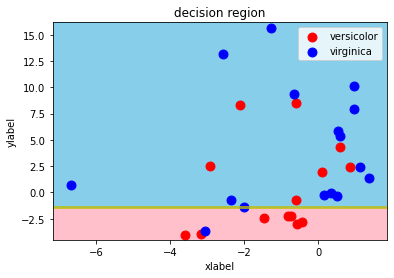

In [ ]:
decision_region(X_train, y_train, tf)